In [1]:
import os

import matplotlib.patches as mpathes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data_path = 'data/'
data_file = 'trainingData.csv'
data_file_new = 'trainingData_new.csv'

In [3]:
# Using Times New Roman font
plt.rcParams['font.family'] = 'Times New Roman'

In [4]:
# If file not exist:
if not os.path.exists(data_path + data_file_new):
    # Read data from CSV file
    data_frame = pd.read_csv(data_path + data_file)
    # Add a new column "REFERENCE" to the data_frame
    """Reference, method from:
    https://github.com/kyeongsoo/indoor_localization/blob/master/python/bfl_multi-label_classification.py
    """
    data_frame['REFERENCE'] = data_frame.apply(lambda row: str(
        int(row['SPACEID'])) + str(int(row['RELATIVEPOSITION'])),
                                               axis=1)
    blds = np.unique(data_frame[['BUILDINGID']])
    flrs = np.unique(data_frame[['FLOOR']])
    for bld in blds:
        for flr in flrs:
            cond = (data_frame['BUILDINGID'] == bld) & (data_frame['FLOOR']
                                                        == flr)
            _, idx = np.unique(data_frame.loc[cond, 'REFERENCE'],
                               return_inverse=True)
            data_frame.loc[cond, 'REFERENCE'] = idx
    # Save the data to a new CSV file
    data_frame.to_csv(data_path + data_file_new)

In [5]:
data_frame = pd.read_csv(data_path + data_file_new)
# Get the unique values of the column "REFERENCE"
reference = data_frame['REFERENCE'].sort_values().unique()
print('Number of reference points: ', len(reference))
# Group the data based on the "LONGITUDE, LATITUDE" pair and get "REFERENCE"
mapper_lon = data_frame.groupby(['REFERENCE'])['LONGITUDE'].unique()
mapper_lat = data_frame.groupby(['REFERENCE'])['LATITUDE'].unique()
# Mapper is a dictionary with key is a pair of (LONGITUDE, LATITUDE)
mapper = {}
for i in range(len(reference)):
    mapper[i] = [mapper_lon[i][0], mapper_lat[i][0]]
# Save the mapper to a CSV file
pd.DataFrame(mapper).to_csv(data_path + 'mapper.csv')
# Check if a pair of (LONGITUDE, LATITUDE) has more than one REFERENCE
flag = 0
for key, value in mapper.items():
    if len(value) > 2:
        print('Reference point {} \t\t has pair (log, lat) {}'.format(
            key, value))
        flag += 1
if flag == 0:
    print('No pair of (LONGITUDE, LATITUDE) has more than one REFERENCE')
else:
    print('There are', flag,
          'pairs of (LONGITUDE, LATITUDE) have more than one REFERENCE')

Number of reference points:  110
No pair of (LONGITUDE, LATITUDE) has more than one REFERENCE


Number of RSSI values for each REFERENCE: 
            Unnamed: 0  WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  \
REFERENCE                                                                       
0                 263     263     263     263     263     263     263     263   
1                 346     346     346     346     346     346     346     346   
2                 312     312     312     312     312     312     312     312   
3                 321     321     321     321     321     321     321     321   
4                 382     382     382     382     382     382     382     382   
...               ...     ...     ...     ...     ...     ...     ...     ...   
105                20      20      20      20      20      20      20      20   
106                20      20      20      20      20      20      20      20   
107                10      10      10      10      10      10      10      10   
108                10      10      10      10      10      10    

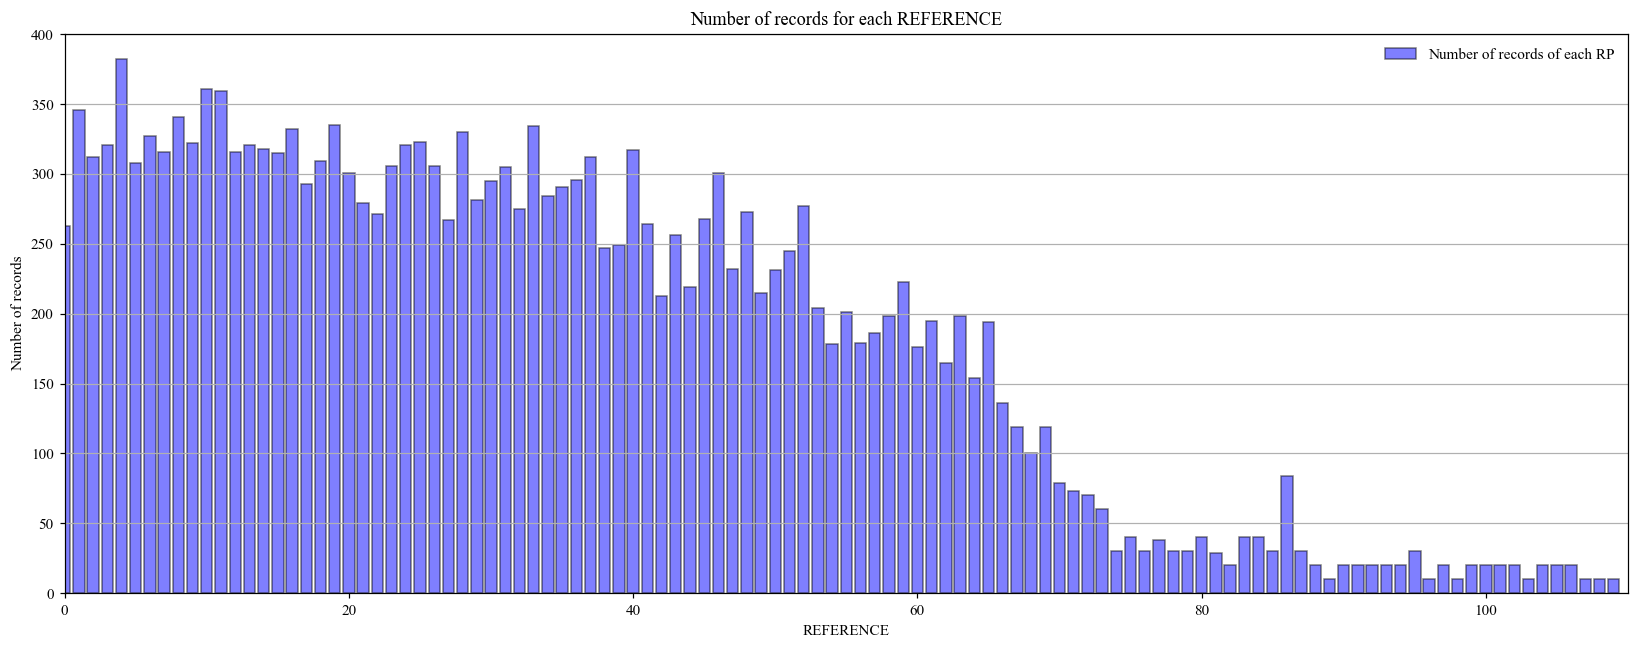

In [6]:
# Get the RSSI based on the REFERENCE
rssi_ref = data_frame.groupby(['REFERENCE'])
# Print the number of RSSI values for each REFERENCE
print('Number of RSSI values for each REFERENCE: \n', rssi_ref.count())
# Plot the barchart of the number of records for each REFERENCE
plt.figure(figsize=(15, 6), dpi=110)
plt.bar(
    rssi_ref.count().index,
    rssi_ref.count()['Unnamed: 0'],
    edgecolor='k',
    linewidth=1,
    alpha=0.5,
    color='b',
    label='Number of records of each RP',
)
plt.xlabel('REFERENCE')
plt.ylabel('Number of records')
plt.title('Number of records for each REFERENCE')
plt.tight_layout()
plt.grid(axis='y')
plt.xlim(0, 110)
plt.ylim(0, 400)
plt.legend(frameon=False)

(-110.0, 0.0)

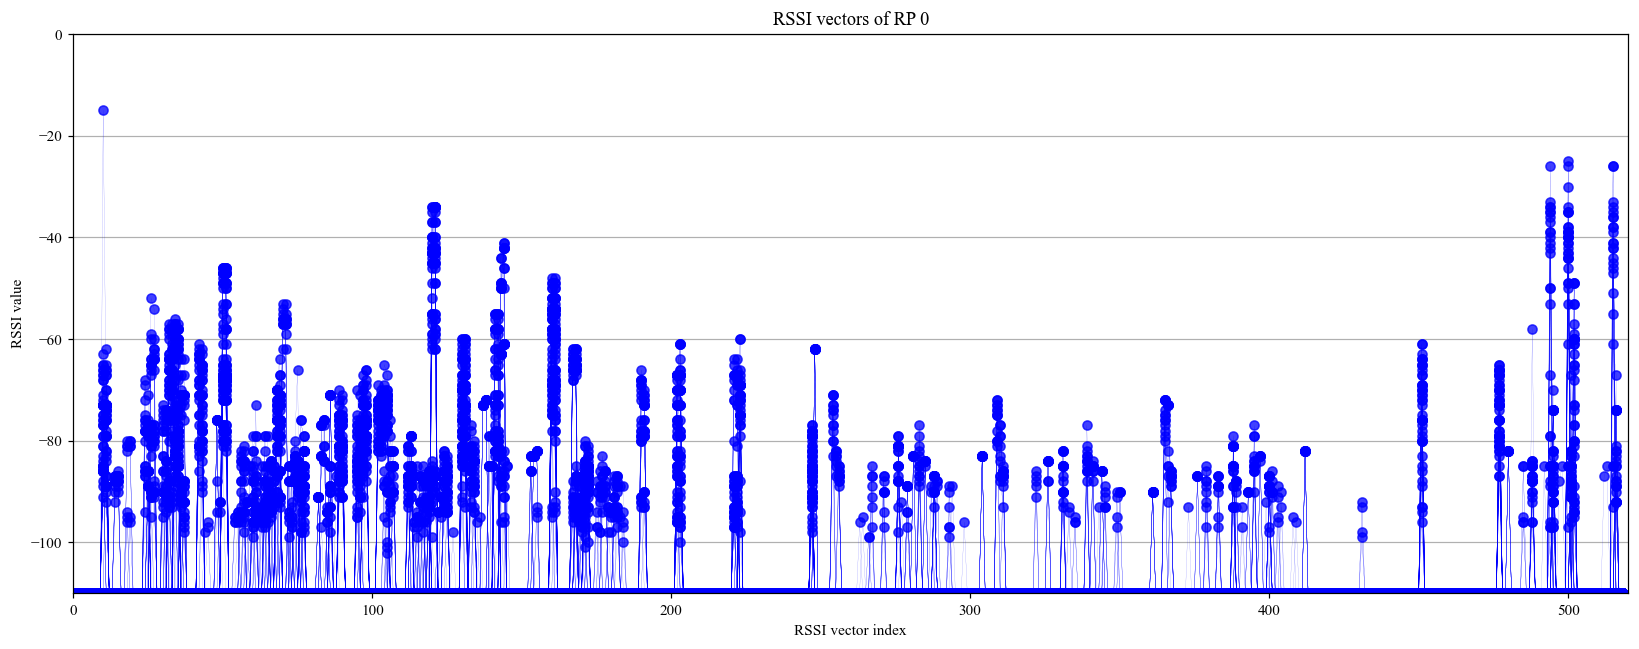

In [7]:
# Get the RSSI vectors [0,520] of each record based on the REFERENCE
rssi_ref = data_frame.groupby(['REFERENCE'])[data_frame.columns[0:520]]
# Plot the RSSI vectors of the REFERENCE 0
plt.figure(figsize=(15, 6), dpi=110)
plt.plot(
    rssi_ref.get_group(0).values.T[1:],
    linewidth=.1,
    alpha=0.75,
    color='b',
    marker='o',
)
plt.xlabel('RSSI vector index')
plt.ylabel('RSSI value')
plt.title('RSSI vectors of RP 0')
plt.tight_layout()
plt.grid(axis='y')
plt.xlim(0, 520)
plt.ylim(-110, 0)

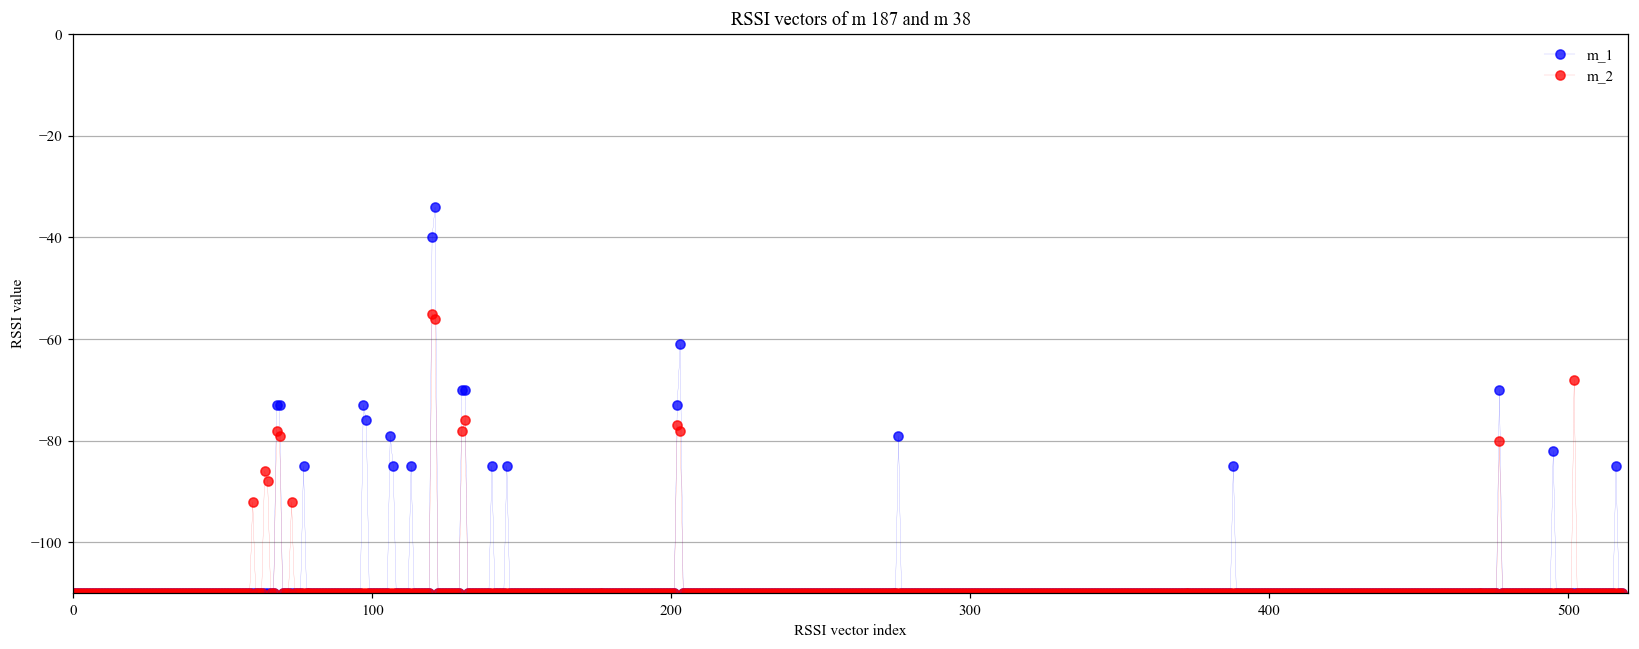

In [8]:
# Randomly select 2 RSSI vectors of the REFERENCE 0
index_1 = np.random.randint(0, len(rssi_ref.get_group(0).values))
m_1 = rssi_ref.get_group(0).values[index_1]
index_2 = np.random.randint(0, len(rssi_ref.get_group(0).values))
m_2 = rssi_ref.get_group(0).values[index_2]
# Remove the first element of the RSSI vectors
m_1 = m_1[1:]
m_2 = m_2[1:]
# Plot the RSSI vectors of m_1 and m_2
plt.figure(figsize=(15, 6), dpi=110)
plt.plot(m_1, linewidth=.1, alpha=0.75, color='b', marker='o', label='m_1')
plt.plot(m_2, linewidth=.1, alpha=0.75, color='r', marker='o', label='m_2')
plt.xlabel('RSSI vector index')
plt.ylabel('RSSI value')
plt.title('RSSI vectors of m {} and m {}'.format(index_1, index_2))
plt.tight_layout()
plt.grid(axis='y')
plt.xlim(0, 520)
plt.ylim(-110, 0)
plt.legend(frameon=False)

Maximum RSSI values of m_1: 
 [-110 -110 -110 -110 -110 -110  -73  -85 -110  -73  -79  -85  -34  -70
  -85 -110 -110 -110 -110 -110  -61 -110 -110 -110 -110 -110 -110  -79
 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110  -85 -110 -110 -110
 -110 -110 -110 -110 -110  -70 -110  -82 -110  -85]
Minimum RSSI values of m_1: 
 [-110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110
 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110
 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110
 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110]
Maximum RSSI values of m_2: 
 [-110 -110 -110 -110 -110 -110  -78  -92 -110 -110 -110 -110  -55  -76
 -110 -110 -110 -110 -110 -110  -77 -110 -110 -110 -110 -110 -110 -110
 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110
 -110 -110 -110 -110 -110  -80 -110 -110  -68 -110]
Minimum RSSI values of m_2: 
 [-110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110
 -110 -110 -11

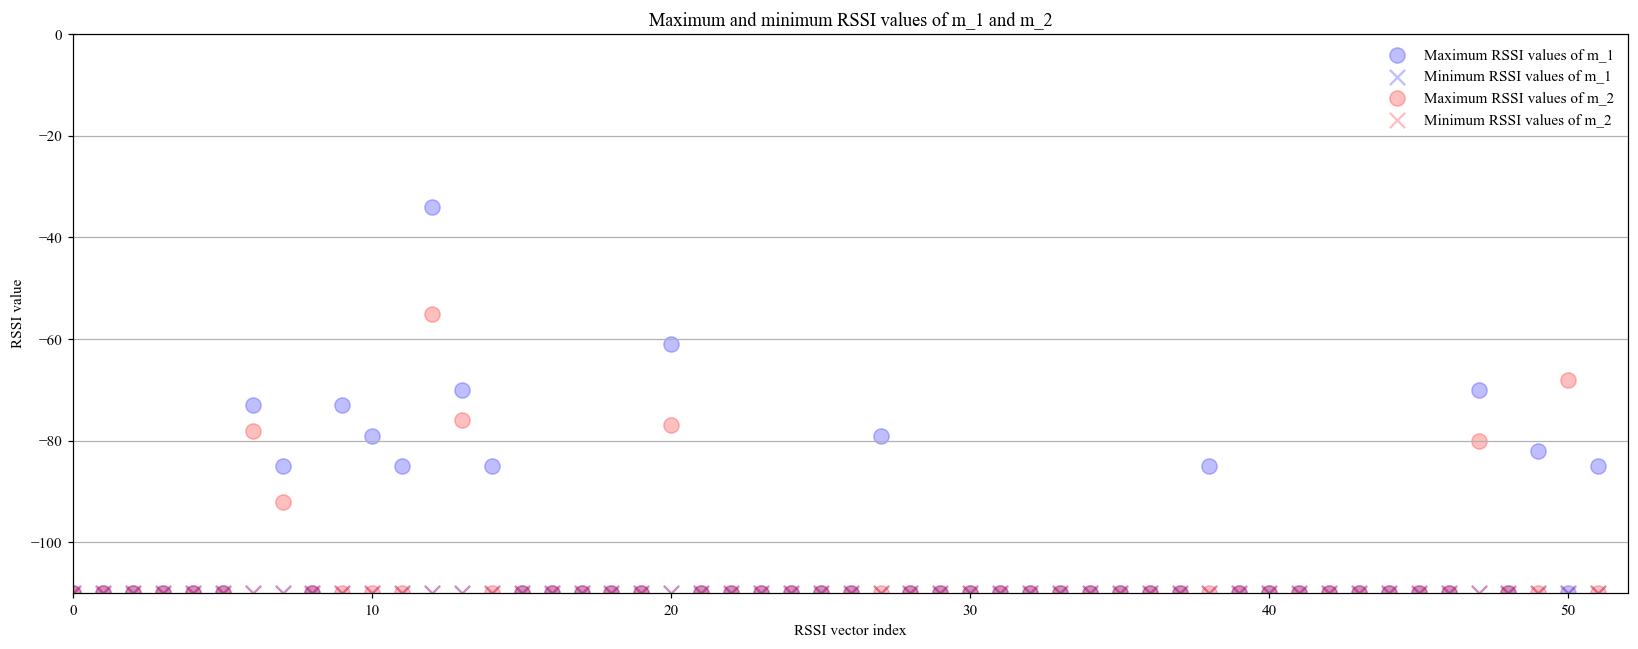

In [9]:
# Divide the RSSI vectors of m_1 and m_2 into div parts, i.e., 10 parts with step size = 52
div = 52
m_1 = np.array_split(m_1, div)
m_2 = np.array_split(m_2, div)
# Get the maximum RSSI value of each part
m_1_max = np.array([np.max(m_1[i]) for i in range(len(m_1))])
m_2_max = np.array([np.max(m_2[i]) for i in range(len(m_2))])
# Get the minimum RSSI value of each part
m_1_min = np.array([np.min(m_1[i]) for i in range(len(m_1))])
m_2_min = np.array([np.min(m_2[i]) for i in range(len(m_2))])
# Print the maximum and minimum RSSI values of each part
print('Maximum RSSI values of m_1: \n', m_1_max)
print('Minimum RSSI values of m_1: \n', m_1_min)
print('Maximum RSSI values of m_2: \n', m_2_max)
print('Minimum RSSI values of m_2: \n', m_2_min)
# Plot the maximum and minimum RSSI values of each part
plt.figure(figsize=(15, 6), dpi=110)
plt.scatter(
    np.arange(0, div, 1),
    m_1_max,
    s=100,
    c='b',
    marker='o',
    label='Maximum RSSI values of m_1',
    alpha=0.25,
)
plt.scatter(
    np.arange(0, div, 1),
    m_1_min,
    s=100,
    c='b',
    marker='x',
    label='Minimum RSSI values of m_1',
    alpha=0.25,
)
plt.scatter(
    np.arange(0, div, 1),
    m_2_max,
    s=100,
    c='r',
    marker='o',
    label='Maximum RSSI values of m_2',
    alpha=0.25,
)
plt.scatter(
    np.arange(0, div, 1),
    m_2_min,
    s=100,
    c='r',
    marker='x',
    label='Minimum RSSI values of m_2',
    alpha=0.25,
)
plt.xlabel('RSSI vector index')
plt.ylabel('RSSI value')
plt.title('Maximum and minimum RSSI values of m_1 and m_2')
plt.tight_layout()
plt.grid(axis='y')
plt.xlim(0, div)
plt.ylim(-110, 0)
plt.legend(frameon=False)

Height of boxes:  [ 0  0  0  0  0  0 37 25  0 37 31 25 76 40 25  0  0  0  0  0 49  0  0  0
  0  0  0 31  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0 40
  0 28  0 25]
Width of boxes:  [ 0  0  0  0  0  0 32 18  0  0  0  0 55 34  0  0  0  0  0  0 33  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 30
  0  0 42  0]
Number of valid boxes:  6


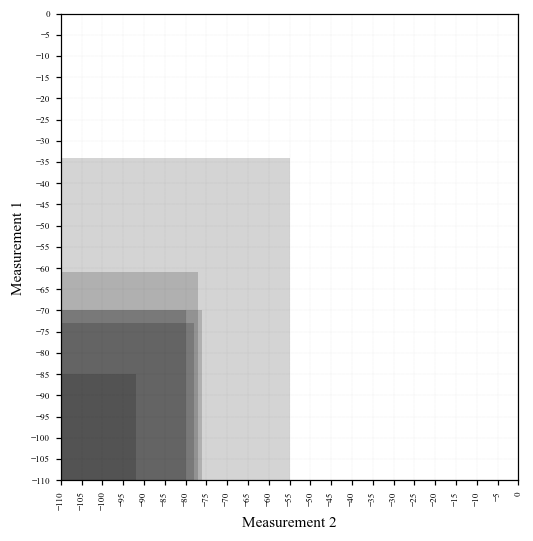

Area of each valid box:  [1184  450 4180 1360 1617 1200]


In [10]:
# Height of y axis is m1's max - min
y_height = m_1_max - m_1_min
print('Height of boxes: ', y_height)
# Width of x axis is m2's max - min
x_width = m_2_max - m_2_min
print('Width of boxes: ', x_width)
# Check if the height and width are the valid values (not all of them are 0)
valid = np.sum(np.logical_and(y_height != 0, x_width != 0))
print('Number of valid boxes: ', valid)
# Plot the rectangle based on the maximum of m_1 and m_2, and y_height and x_width
plt.figure(figsize=(5, 5), dpi=110)
box = []
for i in range(len(m_1_max)):
    box = mpathes.Rectangle(
        (m_2_min[i], m_1_min[i]),
        x_width[i],
        y_height[i],
        facecolor='k',
        alpha=1 / valid,
    )
    plt.gca().add_patch(box)
plt.xlabel('Measurement 2')
plt.ylabel('Measurement 1')
plt.tight_layout()
plt.grid(
    axis='both',
    linestyle='--',
    linewidth=0.1,
    alpha=0.25,
    color='k',
)
plt.xticks(
    np.arange(-110, 10, 5),
    fontsize=6,
    rotation=90,
)
plt.xlim(-110, 0)
plt.yticks(
    np.arange(-110, 10, 5),
    fontsize=6,
)
plt.ylim(-110, 0)
plt.show()
# clculate the area of each box
area = y_height * x_width
print('Area of each valid box: ', area[area != 0])

Area of each valid box:  [1184  450 4180 1360 1617 1200]
m_1_start: 
 [-110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110
 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110
 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110
 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110]
m_1_end: 
 [-110 -110 -110 -110 -110 -110  -73  -85 -110  -73  -79  -85  -34  -70
  -85 -110 -110 -110 -110 -110  -61 -110 -110 -110 -110 -110 -110  -79
 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110  -85 -110 -110 -110
 -110 -110 -110 -110 -110  -70 -110  -82 -110  -85]
m_2_start: 
 [-110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110
 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110
 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110
 -110 -110 -110 -110 -110 -110 -110 -110 -110 -110]
m_2_end: 
 [-110 -110 -110 -110 -110 -110  -78  -92 -110 -110 -110 -110  -55  -76
 -110 -110 -110 -110 -110 -11

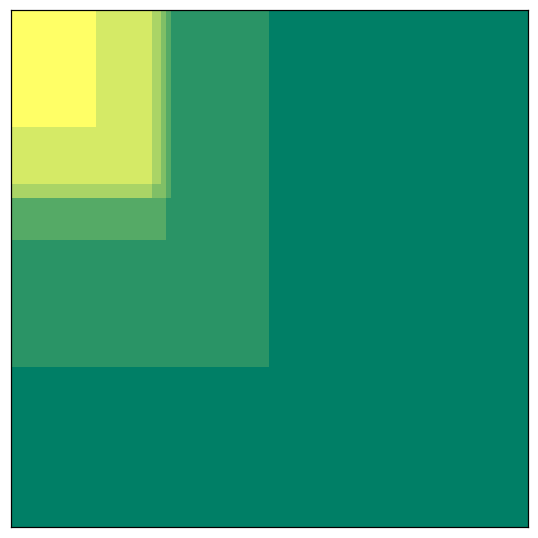

In [11]:
# Calculate the area of each valid boxes
area = y_height * x_width
print('Area of each valid box: ', area[area != 0])
# Define the start and end points of the m_1 and m_2
m_1_start = m_1_min
m_1_end = m_1_max
m_2_start = m_2_min
m_2_end = m_2_max
print('m_1_start: \n', m_1_start)
print('m_1_end: \n', m_1_end)
print('m_2_start: \n', m_2_start)
print('m_2_end: \n', m_2_end)
# Fill the section between the start and end points with 1
m_1_fill = np.zeros((div, 110))
m_2_fill = np.zeros((div, 110))
# Define the overlap area [div, div]
overlap = np.zeros((110, 110))
for i in range(div):
    m_1_fill[i, m_1_start[i]:m_1_end[i]] = 1
    m_1_fill[i] = np.reshape(m_1_fill[i], (1, 110))
    m_2_fill[i, m_2_start[i]:m_2_end[i]] = 1
    m_2_fill[i] = np.reshape(m_2_fill[i], (1, 110))
# Save the m_1_fill and m_2_fill
np.savetxt('m_1_fill.csv', m_1_fill, delimiter=',')
np.savetxt('m_2_fill.csv', m_2_fill, delimiter=',')
# Get the overlap area
for i in range(div):
    x = np.asarray(np.reshape(m_1_fill[i, :], (110, 1)))
    y = np.asarray(np.reshape(m_2_fill[i, :], (110, 1)))
    overlap = overlap + x * np.transpose(y)
# Plot the overlap area
plt.figure(figsize=(5, 5), dpi=110)
plt.imshow(overlap, cmap='summer')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

ToDo - Remapping phases

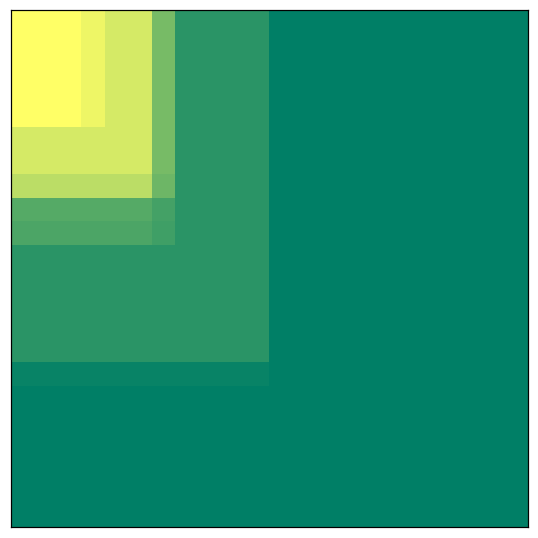

In [12]:
# Using resampling to remapping the overlap area, gird size is 'resample_step'^2
resample_step = 5
overlap_resample = np.zeros(
    (int(110 / resample_step), int(110 / resample_step)))
for i in range(int(110 / resample_step)):
    for j in range(int(110 / resample_step)):
        overlap_resample[i, j] = np.sum(
            overlap[i * resample_step:(i + 1) * resample_step,
            j * resample_step:(j + 1) * resample_step])
plt.figure(figsize=(5, 5), dpi=110)
plt.imshow(overlap_resample, cmap='summer')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()
